In [1]:
! activate ai-azure-c1

import sys

sys.path.append("/opt/conda/envs/ai-azure-c1/lib/python3.8/site-packages")

import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()
    
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [2]:
PREDICTION_ENDPOINT = "https://dungdocustomvision-prediction.cognitiveservices.azure.com/"
prediction_key = "bfd558bd968a4ee8ad3f7f09cb6cfd70"
prediction_resource_id = "/subscriptions/21c53bc7-9f96-4753-9901-99cd641ad4e7/resourceGroups/ODL-AIND-195702/providers/Microsoft.CognitiveServices/accounts/dungdocustomvision-Prediction/cskeys"

In [3]:
local_project_id = 'f49b5169-1790-4bb0-998c-8f4ab18bd9b6'
local_publish_iteration_name = "lighter-check"

In [4]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, prediction_credentials)

In [5]:
predictor.api_version

'3.1'

In [6]:
local_image_path = '/home/workspace/'

In [7]:
def perform_prediction(image_file_name):
    with open(os.path.join (local_image_path,  image_file_name), "rb") as image_contents:
        results = predictor.classify_image(local_project_id, local_publish_iteration_name, image_contents.read())
        # Display the results.
        for prediction in results.predictions:
            print("\t" + prediction.tag_name +
                  ": {0:.2f}%".format(prediction.probability * 100))

In [8]:
file_name_1 = 'lighter_test_set_1of5.jpg'
file_name_2 = 'lighter_test_set_2of5.jpg'
file_name_3 = 'lighter_test_set_3of5.jpg'
file_name_4 = 'lighter_test_set_4of5.jpg'
file_name_5 = 'lighter_test_set_5of5.jpg'

In [9]:
perform_prediction(file_name_1)
perform_prediction(file_name_2)
perform_prediction(file_name_3)
perform_prediction(file_name_4)
perform_prediction(file_name_5)

	LighterChecking: 100.00%
	LighterChecking: 100.00%
	LighterChecking: 100.00%
	LighterChecking: 100.00%
	LighterChecking: 100.00%


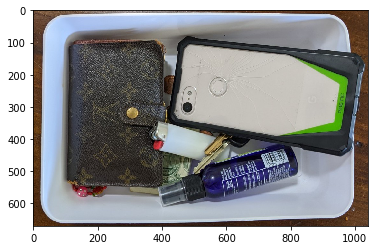

In [10]:
with open(os.path.join (local_image_path, file_name_1), 'rb') as img_code:
    img_view_ready = Image.open(img_code)
    plt.figure()
    plt.imshow(img_view_ready)